In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
submission_predictions = pd.read_csv('submission.csv', sep='|')
submission_predictions

,userID,itemID,prediction
0,0,20664,NaN
1,0,28231,NaN
2,13,2690,NaN
3,15,1299,NaN
4,15,20968,NaN
...,...,...,...
9995,46118,20106,NaN
9996,46124,19677,NaN
9997,46125,12878,NaN
9998,46127,7963,NaN


In [4]:
submission_predictions.drop('prediction', axis=1)

,userID,itemID
0,0,20664
1,0,28231
2,13,2690
3,15,1299
4,15,20968
...,...,...
9995,46118,20106
9996,46124,19677
9997,46125,12878
9998,46127,7963


In [6]:
submission_predictions.to_csv('submission_predictions.csv', sep='|')

In [2]:
def multiclassScore(y: pd.Series, y_pred: pd.Series,normalize :bool = False) -> float:
    if (y.astype(int).apply(lambda x: x in [0,1,2,3,4]).all() == False) or (y_pred.astype(int).apply(lambda x: x in [0,1,2,3,4]).all() == False) :
        raise ValueError('y and y_pred are only allowed to contain the elements 0,1,2,3,4')


    behaviourY = np.where(y>0,1,0) #1 is buying
    behaviourPredY = np.where(y_pred>0,1,0)
    correctBehaviour = np.sum(behaviourY == behaviourPredY)

    correctPredictionsWeek = np.sum((y == y_pred) & (y > 0))

    score = (correctBehaviour-correctPredictionsWeek)*1+correctPredictionsWeek*3

    if normalize == True:
        maxScore = np.sum((y>0)*3 + (y==0)*1)
        return(score/maxScore)
    else:
        return(score)


In [13]:
train_set = pd.read_csv('train_70_backgroundTrainTestsplit.csv')
test_set = pd.read_csv('test_30_backgroundTrainTestsplit.csv')
train_set

,userID,itemID,prediction
0,31233,21596,0.0
1,22721,31702,0.0
2,33799,18498,0.0
3,35553,2394,0.0
4,21718,10958,0.0
...,...,...,...
64238,2541,16303,1.0
64239,18879,15389,0.0
64240,4751,11906,0.0
64241,36896,28827,0.0


In [21]:
u_features = pd.read_csv('U_FEAT_till_3_1.csv', index_col=0)
i_features = pd.read_csv('item_features_TIMO.csv', index_col=0, sep=',')
ui_train_features = pd.read_csv('train_allFeatures.csv', index_col=0, sep='|')
ui_test_features = pd.read_csv('test_allFeatures.csv', index_col=0, sep='|')
i_features

,IT_performance_change_whole_branch_cb,itemID,IT_performance_change_whole_branch_fb,IT_performance_in_branch_fb_change,IT_performance_in_branch_cb_change,IT_performance_in_branch_fb,IT_performance_in_branch_cb,IT_rebought_rate_ft1,IT_rebought_rate_ft2,IT_rebought_rate_ft3,...,IT_boughts_total,IT_boughts_last6w,IT_prct_last6w,IT_not_avaible,IT_PCA_comp1,IT_PCA_comp2,IT_PCA_comp3,IT_PCA_comp4,IT_PCA_comp5,IT_PCA_NA
0,0.0,1,0.00463678516228748,-0.020663072006324057,-1.0,0.0,0.0,0.285652,0.287673,0.277664,...,8,0.0,0.000000,0,-0.354151,-0.418397,0.025024,0.344274,-0.172784,False
1,0.05454545454545454,6,-0.07226107226107226,0.026129962020457018,0.0747764799996038,0.09893312516263336,0.5897435897435898,0.291240,0.287673,0.400000,...,86,14.0,0.162791,0,0.358173,-0.587056,-0.192602,-0.141174,-0.087613,False
2,0.07191780821917808,8,0.037037037037037035,0.10754221087554419,0.014345587108794071,0.23737373737373738,0.04337393872277593,0.285652,0.287673,0.352814,...,16,5.0,0.312500,0,0.054571,-0.701858,-0.024435,-0.199242,-0.101711,False
3,-0.10679611650485436,9,-0.13513513513513514,0.0,-0.03339757266082727,1.0,0.3576923076923077,0.285652,0.269808,0.262343,...,96,16.0,0.166667,0,0.218399,0.690918,0.695077,-0.169999,-0.176093,False
4,0.42857142857142855,11,0.2,-1.0,-1.0,0.0,0.0,0.291240,0.269808,0.230769,...,2,1.0,0.500000,0,-0.144407,-0.635417,0.070115,-0.101826,-0.081411,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12297,mean,32764,mean,mean,mean,mean,mean,0.285652,0.255614,0.166667,...,8,0.0,0.000000,1,0.893846,0.072595,0.019580,0.166872,0.026330,False
12298,0.0036377560788818687,32766,-0.3333333333333333,-0.6428571428571429,-0.0020300012604868643,0.0,0.0,0.285652,0.269808,0.288660,...,8,1.0,0.125000,0,0.419114,0.601917,0.010060,-0.055097,0.149495,False
12299,-0.060291060291060294,32768,-0.3617021276595745,0.2790816326530613,0.006854993082102842,0.7833333333333333,0.048420698924731186,0.291240,0.287673,0.343590,...,48,10.0,0.208333,0,-0.430959,-0.644820,-0.260607,-0.197230,0.065124,False
12300,-0.13043478260869565,32769,-0.08847184986595175,0.03511235779319133,0.0,0.12043516800659657,1.0,0.260256,0.287673,0.267231,...,39,8.0,0.205128,0,-0.507310,0.693251,-0.116650,-0.114171,0.101169,False


In [23]:
i_features.columns

Index(['IT_performance_change_whole_branch_cb', 'itemID',
       'IT_performance_change_whole_branch_fb',
       'IT_performance_in_branch_fb_change',
       'IT_performance_in_branch_cb_change', 'IT_performance_in_branch_fb',
       'IT_performance_in_branch_cb', 'IT_rebought_rate_ft1',
       'IT_rebought_rate_ft2', 'IT_rebought_rate_ft3', 'IT_rebought_rate_ft4',
       'IT_rebought_rate_ft5', 'IT_rebought_rate_brnd',
       'IT_avg_time_btw_boughts', 'IT_last_purchase', 'IT_first_purchase',
       'IT_ourder_cnt', 'IT_mean', 'IT_rebough_rate3', 'IT_boughts_total',
       'IT_boughts_last6w', 'IT_prct_last6w', 'IT_not_avaible', 'IT_PCA_comp1',
       'IT_PCA_comp2', 'IT_PCA_comp3', 'IT_PCA_comp4', 'IT_PCA_comp5',
       'IT_PCA_NA'],
      dtype='object')

In [22]:
ui_features = pd.concat([ui_train_features, ui_test_features], axis=0)
ui_features

,userID,itemID,cumsum,last7d,last14d,last21d,last28d,similar>0COrderSumIncl,similar>0COrderCountIncl,similar>0COrderSumExcl,similar>0COrderCountExcl,sameBrandOrderSumIncl,sameBrandOrderCountIncl,sameBrandOrderSumExcl,sameBrandOrderCountExcl,order,avg_time_orders,day_first_purchase,day_last_purchase,usage_time_items
0,1199,637,5,0.0,0.0,0.0,0.0,5,2,0,0,6,3,1,1,3,126.000000,14,140,42.000000
1,21557,3520,2,0.0,0.0,0.0,0.0,3,3,1,1,3,3,1,1,1,83.000000,72,155,83.000000
2,23387,1633,2,0.0,0.0,0.0,0.0,2,2,0,0,2,2,0,0,1,124.000000,31,155,124.000000
3,32069,29311,5,0.0,0.0,0.0,2.0,9,7,4,4,5,3,0,0,2,28.000000,135,191,21.250000
4,30359,11124,2,0.0,0.0,0.0,0.0,11,11,9,9,2,2,0,0,1,10.000000,119,129,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27529,2176,9773,2,0.0,0.0,0.0,0.0,5,5,3,3,4,4,2,2,1,42.000000,138,180,42.000000
27530,20041,19824,4,0.0,0.0,0.0,0.0,4,4,0,0,4,4,0,0,1,53.333333,25,185,53.333333
27531,39920,18714,4,0.0,0.0,0.0,0.0,4,2,0,0,4,2,0,0,2,159.000000,23,182,79.500000
27532,5127,1299,3,1.0,1.0,1.0,1.0,6,6,3,3,5,5,2,2,1,47.500000,118,213,47.500000


In [26]:
ui_features.columns

Index(['userID', 'itemID', 'cumsum', 'last7d', 'last14d', 'last21d', 'last28d',
       'similar>0COrderSumIncl', 'similar>0COrderCountIncl',
       'similar>0COrderSumExcl', 'similar>0COrderCountExcl',
       'sameBrandOrderSumIncl', 'sameBrandOrderCountIncl',
       'sameBrandOrderSumExcl', 'sameBrandOrderCountExcl', 'order',
       'avg_time_orders', 'day_first_purchase', 'day_last_purchase',
       'usage_time_items'],
      dtype='object')

In [27]:
u_features.columns

Index(['userID', 'u_EF', 'u_avg_orders', 'u_avg_period', 'u_first_bought',
       'u_last_bought', 'u_std_avg_period', 'u_mean_bought', 'u_std_bought'],
      dtype='object')

### reduce features

In [28]:
item_feat = i_features[['itemID','IT_boughts_total','IT_boughts_last6w', 'IT_avg_time_btw_boughts']].copy()
ui_feat = ui_features[['userID', 'itemID','day_last_purchase', 'last28d', 'avg_time_orders']].copy()
u_feat = u_features.drop(columns = ['u_EF', 'u_avg_period'])
item_feat

,itemID,IT_boughts_total,IT_boughts_last6w,IT_avg_time_btw_boughts
0,1,8,0.0,90.000000
1,6,86,14.0,74.995370
2,8,16,5.0,34.000000
3,9,96,16.0,69.191667
4,11,2,1.0,102.000000
...,...,...,...,...
12297,32764,8,0.0,18.000000
12298,32766,8,1.0,83.500000
12299,32768,48,10.0,101.650000
12300,32769,39,8.0,93.000000


In [30]:
X_train = train_set.merge(ui_feat, how = 'left', on = ['userID', 'itemID']).merge(u_feat, how = 'left', on ='userID').merge(item_feat, how='left', on='itemID')
X_test = (test_set.merge(ui_feat, how = 'left', on = ['userID', 'itemID'])).merge(u_feat, how = 'left', on ='userID').merge(item_feat, how='left', on='itemID')
X_train

,userID,itemID,prediction,day_last_purchase,last28d,avg_time_orders,u_avg_orders,u_first_bought,u_last_bought,u_std_avg_period,u_mean_bought,u_std_bought,IT_boughts_total,IT_boughts_last6w,IT_avg_time_btw_boughts
0,31233,21596,0.0,189,1.0,117.0,1.64,8,189,24.49,102.00,73.54,512,123.0,63.216129
1,22721,31702,0.0,179,0.0,142.0,1.76,33,214,10.22,116.14,63.50,1148,168.0,75.602187
2,33799,18498,0.0,150,0.0,68.0,1.26,14,202,18.16,105.10,63.30,252,38.0,68.082083
3,35553,2394,0.0,194,1.0,105.0,1.19,30,194,14.14,102.14,53.13,13,3.0,72.500000
4,21718,10958,0.0,168,0.0,146.0,1.09,22,207,12.80,117.91,60.19,96,13.0,77.685897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64238,2541,16303,1.0,161,0.0,83.0,1.26,3,210,14.67,107.23,68.90,139,23.0,93.500000
64239,18879,15389,0.0,181,0.0,85.0,1.22,13,181,17.52,104.14,54.52,343,51.0,69.620922
64240,4751,11906,0.0,210,1.0,47.0,1.42,6,210,6.79,112.00,62.34,45,3.0,80.500000
64241,36896,28827,0.0,195,1.0,38.4,1.43,3,195,7.71,105.85,60.06,293,54.0,86.574444


In [31]:
X_test

,userID,itemID,prediction,day_last_purchase,last28d,avg_time_orders,u_avg_orders,u_first_bought,u_last_bought,u_std_avg_period,u_mean_bought,u_std_bought,IT_boughts_total,IT_boughts_last6w,IT_avg_time_btw_boughts
0,12727,3742,0.0,216,4.0,163.0,1.67,6,216,39.81,113.50,86.62,2,1.0,163.000000
1,25360,30429,3.0,180,0.0,58.5,2.53,21,196,18.29,104.88,65.65,122,22.0,70.891667
2,4725,13378,0.0,117,0.0,3.0,1.60,21,127,17.23,70.88,43.00,61,7.0,66.083333
3,29897,461,0.0,184,0.0,54.0,1.41,22,184,19.82,97.12,58.74,804,149.0,80.687002
4,18611,2761,0.0,217,10.0,26.0,3.16,30,217,18.28,110.67,63.77,675,100.0,64.771212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27529,31511,22721,0.0,140,0.0,115.0,1.35,25,203,16.74,112.83,59.05,125,23.0,88.083333
27530,37307,18630,0.0,183,0.0,182.0,1.11,1,197,24.95,117.71,72.95,7537,1211.0,76.687151
27531,5659,24716,0.0,141,0.0,105.0,1.53,36,211,15.56,139.33,61.15,828,138.0,91.585714
27532,3539,110,0.0,63,0.0,14.0,1.42,30,216,24.49,91.00,61.39,233,46.0,80.375000


## Split train_set and test_set into X_train, y_train, X_test and y_test

In [32]:
y_train = X_train['prediction']
y_test = X_test['prediction']

## Random Oversampling

In [34]:
amount_0 = X_train[X_train['prediction'] == 0].shape[0]
amount_1 = X_train[X_train['prediction'] == 1].shape[0]
amount_2 = X_train[X_train['prediction'] == 2].shape[0]
amount_3 = X_train[X_train['prediction'] == 3].shape[0]
amount_4 = X_train[X_train['prediction'] == 4].shape[0]

unlike_0 = amount_1 + amount_2 + amount_3 + amount_4

ratio1 = amount_1 / unlike_0
ratio2 = amount_2 / unlike_0
ratio3 = amount_3 / unlike_0
ratio4 = amount_4 / unlike_0

print(f"0: {amount_0}\t\t1: {amount_1}\t\t2: {amount_2}\t\t3: {amount_3}\t\t4: {amount_4}")

df_1_under = X_train[X_train['prediction'] == 1].sample(round(ratio1 * amount_0), replace=True)
df_2_under = X_train[X_train['prediction'] == 2].sample(round(ratio2 * amount_0), replace=True)
df_3_under = X_train[X_train['prediction'] == 3].sample(round(ratio3 * amount_0), replace=True)
df_4_under = X_train[X_train['prediction'] == 4].sample(round(ratio4 * amount_0), replace=True)

X_train_balanced_over = pd.concat([df_1_under, df_2_under, df_3_under, df_4_under, X_train[X_train['prediction'] == 0]], axis=0)

X_train_balanced_over['prediction'].value_counts()

0: 52883		1: 3030		2: 2677		3: 2798		4: 2855


0.0    52883
1.0    14105
4.0    13291
3.0    13025
2.0    12462
Name: prediction, dtype: int64

## Fit model with Oversampling traing data

In [35]:
# Using random forest model
forest_over = RandomForestClassifier()
# applying GridSearchCV
params = {'criterion': ['gini', 'entropy'],
         'n_estimators': np.arange(100, 104),
         'min_samples_split': np.arange(5, 8),
         'max_depth': np.arange(16, 19)}
clf_over = GridSearchCV(estimator = forest_over, param_grid = params, error_score = 'raise', n_jobs=-1)
clf_over.fit(X_train_balanced_over.drop(columns=['prediction']), X_train_balanced_over['prediction'])
clf_over.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'min_samples_split': 5,
 'n_estimators': 102}

In [36]:
y_pred_balanced_over = clf_over.predict(X_test.drop('prediction', axis=1))

In [37]:
cm_balanced_over = confusion_matrix(y_test, y_pred_balanced_over)
ac_balanced_over = accuracy_score(y_test, y_pred_balanced_over)
score_balanced_over = multiclassScore(y_test, pd.Series(y_pred_balanced_over))
print(cm_balanced_over)
print(f'Accuracy score: {ac_balanced_over}')
print(f'DMC score: {score_balanced_over}')

[[22412    64    23    14    26]
 [ 1248    75     7     5     2]
 [ 1107    16    36     3     2]
 [ 1149    14     2    37     1]
 [ 1251     9     1     0    30]]
Accuracy score: 0.8204401830464153
DMC score: 23008


<AxesSubplot:>

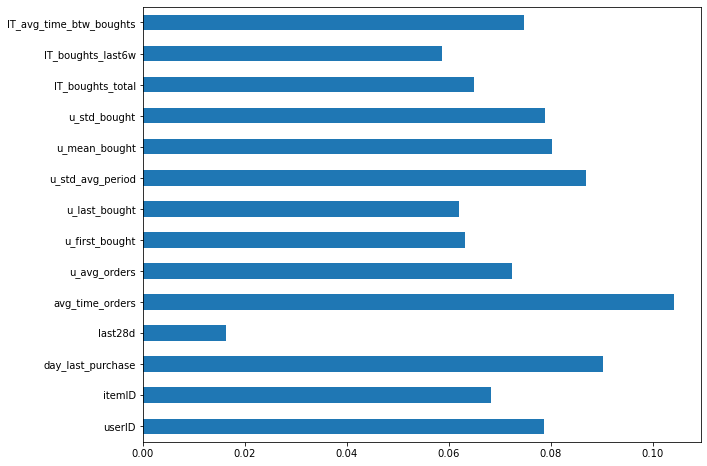

In [38]:
from sklearn.inspection import permutation_importance
final_forest = clf_over.best_estimator_
plt.figure(figsize = (10, 8))
pd.Series(final_forest.feature_importances_, index = X_train_balanced_over.drop('prediction', axis=1).columns).plot(kind = 'barh')


In [39]:
temp = permutation_importance(final_forest,X_test.drop('prediction', axis=1), X_test.loc[:,'prediction'] )

In [40]:
feature_names = [f"feature {i}" for i in X_test.drop('prediction', axis=1).columns]

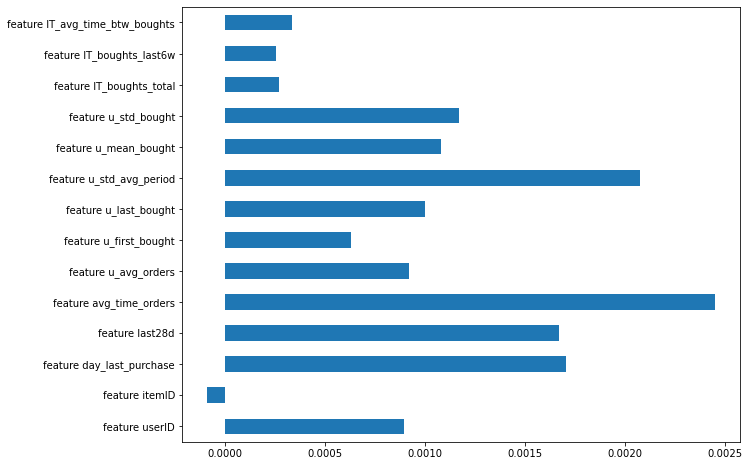

In [41]:
plt.figure(figsize=(10, 8))
pd.Series(temp['importances_mean'], index=feature_names).plot.barh(yerr=temp.importances_std)
plt.savefig('features importance permutation.jpg', pad_inches=1)
plt.show()

In [42]:
temp

{'importances_mean': array([ 8.93440837e-04, -8.71649597e-05,  1.70698046e-03,  1.67066173e-03,
         2.44788262e-03,  9.22495823e-04,  6.31945958e-04,  1.00239704e-03,
         2.07743154e-03,  1.08229825e-03,  1.16946321e-03,  2.68758626e-04,
         2.54231132e-04,  3.34132345e-04]),
 'importances_std': array([0.00014992, 0.00030697, 0.00013195, 0.00042167, 0.00022576,
        0.00021376, 0.0002856 , 0.00021743, 0.00030937, 0.00024675,
        0.00028542, 0.00029826, 0.00024952, 0.0003479 ]),
 'importances': array([[ 8.71649597e-04,  9.44287063e-04,  6.17418464e-04,
          9.80605796e-04,  1.05324326e-03],
        [-2.90549866e-04,  0.00000000e+00, -1.08956200e-04,
         -4.72143532e-04,  4.35824798e-04],
        [ 1.67066173e-03,  1.77961793e-03,  1.48906806e-03,
          1.88857413e-03,  1.70698046e-03],
        [ 1.45274933e-03,  1.81593666e-03,  1.01692453e-03,
          2.28808019e-03,  1.77961793e-03],
        [ 2.36071766e-03,  2.14280526e-03,  2.39703639e-03,
    